In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
coffee = pd.read_csv('/kaggle/input/coffee-sales/index.csv')


In [3]:
coffee.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1060 non-null   object 
 1   datetime     1060 non-null   object 
 2   cash_type    1060 non-null   object 
 3   card         971 non-null    object 
 4   money        1060 non-null   float64
 5   coffee_name  1060 non-null   object 
dtypes: float64(1), object(5)
memory usage: 49.8+ KB


In [5]:
coffee['cash_type'].value_counts()

cash_type
card    971
cash     89
Name: count, dtype: int64

In [6]:
coffee['coffee_name'].value_counts()

coffee_name
Americano with Milk    242
Latte                  229
Cappuccino             187
Americano              162
Cortado                 92
Hot Chocolate           72
Espresso                44
Cocoa                   32
Name: count, dtype: int64

# **Data Preprocessing**

In [7]:
# Date and time
coffee['datetime'] = pd.to_datetime(coffee['datetime'])
coffee['month'] = coffee['datetime'].apply(lambda date: date.month)
coffee['day'] = coffee['datetime'].apply(lambda date: date.day)
coffee['hour'] = coffee['datetime'].apply(lambda date: date.hour)
coffee['day of week'] = coffee['datetime'].dt.day_name()

Since we don't know what kind of vending machine this is, how big it is, etc. the next part is only for research purposes.

We can assume, based on the types of coffee it offers, that it's a five-canister vending machine, containing slots for:
coffee, milk powder, hot chocolate, cocoa powder, and sugar. 

According to ChatGPT:

Americano: Coffee 1 shot + Water 120-180ml; 
Americano with Milk: Coffee 1 shot + Water 90-120ml + Milk 30-60ml;
Latte: Coffee 1 shot + Milk 200-250ml;
Cappuccino: Coffee 1 shot + Milk 100-150ml;
Cortado: Coffee 1 shot + Milk 30-50ml;
Hot Chocolate: Hot Chocolate Mix 20-30gr + Water/Milk 200-250ml;
Espresso: Coffee 1 shot;
Cocoa: Cocoa Powder 10-15gr + Water/Milk 200-250ml

Let's assume that the vending machine is connected to some water pipes. Also, let's assume that 1 shot of milk is 50ml. 
Then the list looks like this:

Americano: Coffee 1 shot + Water;
Americano with Milk: Coffee 1 shot + Water + Milk 1 shot;
Latte: Coffee 1 shot + Milk 4 shots;
Cappuccino: Coffee 1 shot + Milk 2 shots;
Cortado: Coffee 1 shot + Milk 1 shot;
Hot Chocolate: Hot Chocolate Mix 1 shot + Milk 4 shots;
Espresso: Coffee 1 shot;
Cocoa: Cocoa Powder 1 shot + Milk 4 shots

Since we don't have sugar info, and it can vary a lot, we will drop sugar out of this dataframe

In [8]:
# Adding vending machine ingredients

coffee['coffee'] = np.zeros(len(coffee))
coffee['milk powder'] = np.zeros(len(coffee))
coffee['hot chocolate'] = np.zeros(len(coffee))
coffee['cocoa powder'] = np.zeros(len(coffee))

coffee.loc[coffee['coffee_name'] == 'Americano', 'coffee'] = 1
coffee.loc[coffee['coffee_name'] == 'Americano with Milk', ['coffee', 'milk powder']] = [1, 1]
coffee.loc[coffee['coffee_name'] == 'Latte', ['coffee', 'milk powder']] = [1, 4]
coffee.loc[coffee['coffee_name'] == 'Cappuccino', ['coffee', 'milk powder']] = [1, 2]
coffee.loc[coffee['coffee_name'] == 'Cortado', ['coffee', 'milk powder']] = [1, 1]
coffee.loc[coffee['coffee_name'] == 'Hot Chocolate', ['hot chocolate', 'milk powder']] = [1, 4]
coffee.loc[coffee['coffee_name'] == 'Espresso', 'coffee'] = 1
coffee.loc[coffee['coffee_name'] == 'Cocoa', ['cocoa powder', 'milk powder']] = [1, 4]

coffee.head()  

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,day of week,coffee,milk powder,hot chocolate,cocoa powder
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,3,1,10,Friday,1.0,4.0,0.0,0.0
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,1,12,Friday,0.0,4.0,1.0,0.0
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,1,12,Friday,0.0,4.0,1.0,0.0
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,3,1,13,Friday,1.0,0.0,0.0,0.0
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,3,1,13,Friday,1.0,4.0,0.0,0.0


In [9]:
# Create dummies for types of coffee
coffee_type = pd.get_dummies(coffee['coffee_name'], dtype=float, drop_first=True)

coffee = pd.concat([coffee, coffee_type], axis=1)

# **Visualizations**

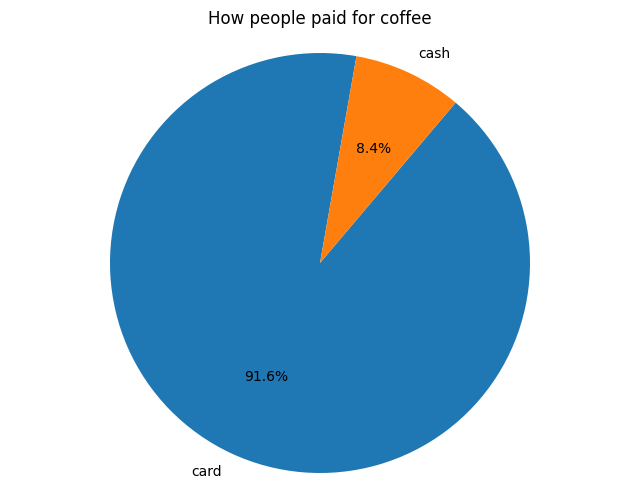

In [10]:
# Card vs. Cash percentages
plt.figure(figsize=(8, 6))
plt.pie(coffee['cash_type'].value_counts(), labels=coffee['cash_type'].unique(), autopct='%1.1f%%', startangle=80)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('How people paid for coffee')
plt.show()

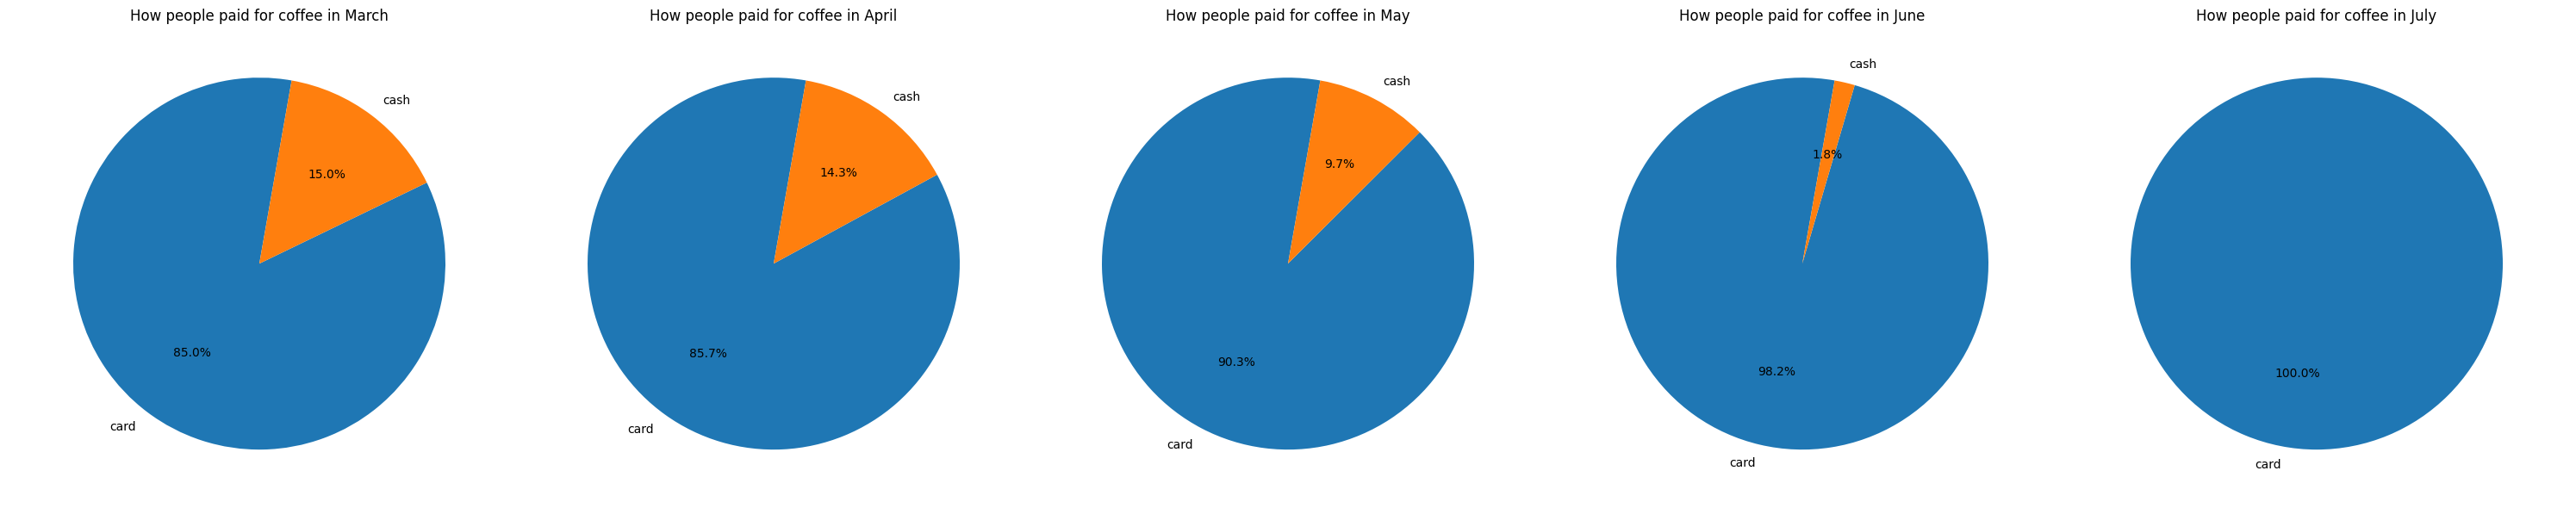

In [11]:
# Card vs. Cash during different months

fig, axes = plt.subplots(1, 5, figsize=(30, 6))

months = [3, 4, 5, 6, 7]
titles = ['March', 'April', 'May', 'June', 'July']

for i, month in enumerate(months):
    month_data = coffee[coffee['month'] == month]['cash_type'].value_counts()
    labels = month_data.index
    sizes = month_data.values
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=80)
    axes[i].axis('equal')
    axes[i].set_title(f'How people paid for coffee in {titles[i]}')

plt.tight_layout()
plt.show()

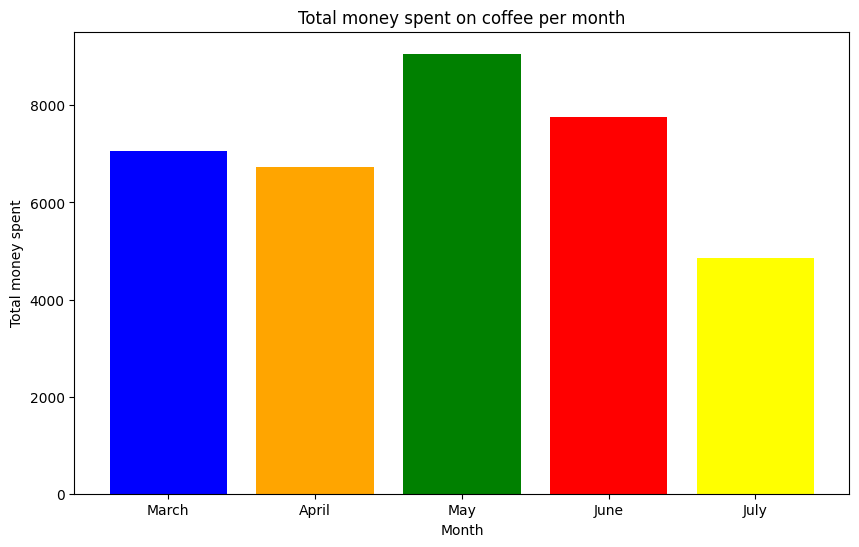

In [12]:
# How much money people spent in different months

money_march = coffee[coffee['month']==3]['money'].sum()
money_april = coffee[coffee['month']==4]['money'].sum()
money_may = coffee[coffee['month']==5]['money'].sum()
money_june = coffee[coffee['month']==6]['money'].sum()
money_july = coffee[coffee['month']==7]['money'].sum()
total_money = [money_march, money_april, money_may, money_june, money_july]

plt.figure(figsize=(10, 6))
plt.bar(titles, total_money, color=['blue', 'orange', 'green', 'red', 'yellow'])
plt.xlabel('Month')
plt.ylabel('Total money spent')
plt.title('Total money spent on coffee per month')
plt.show()

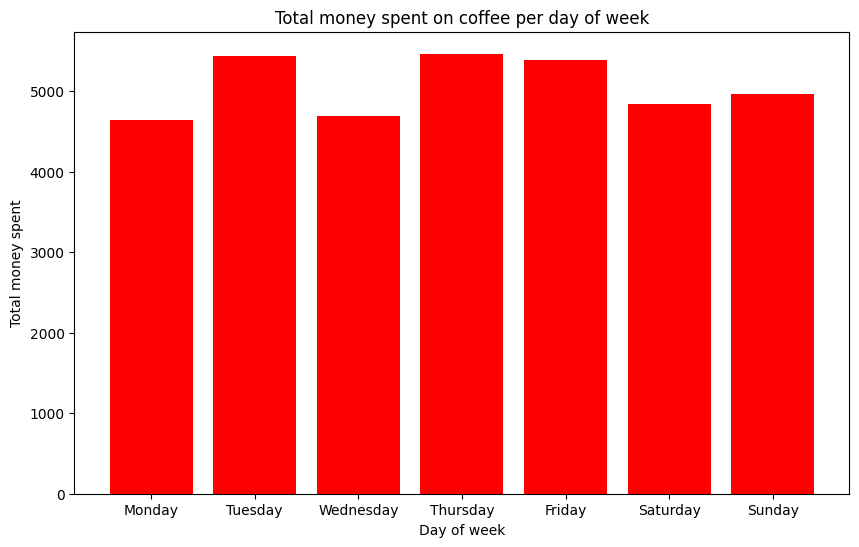

In [13]:
# How much money people spent in different days

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
money_by_day = coffee.groupby('day of week')['money'].sum().reindex(days_of_week)


plt.figure(figsize=(10, 6))
plt.bar(days_of_week, money_by_day, color='red')
plt.xlabel('Day of week')
plt.ylabel('Total money spent')
plt.title('Total money spent on coffee per day of week')
plt.show()

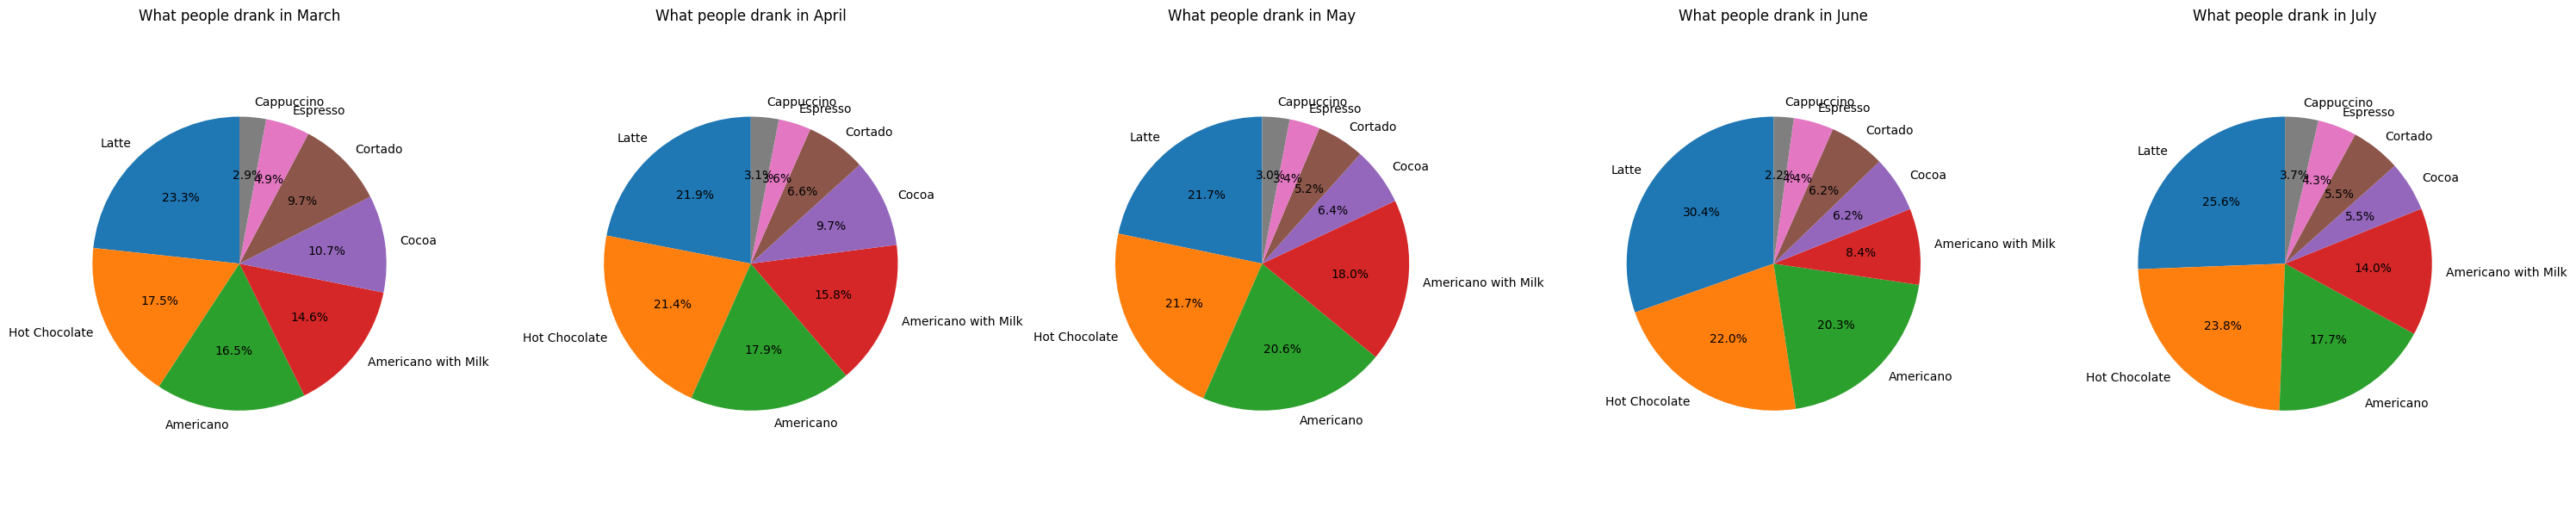

In [14]:
# What people drank in different months

fig, axes = plt.subplots(1, 5, figsize=(30, 6))

for i, month in enumerate(months):
    axes[i].pie(coffee[coffee['month'] == month]['coffee_name'].value_counts(), 
                labels=coffee['coffee_name'].unique(), autopct='%1.1f%%', startangle=90)
    axes[i].axis('equal')
    axes[i].set_title(f'What people drank in {titles[i]}')

plt.tight_layout()
plt.show()

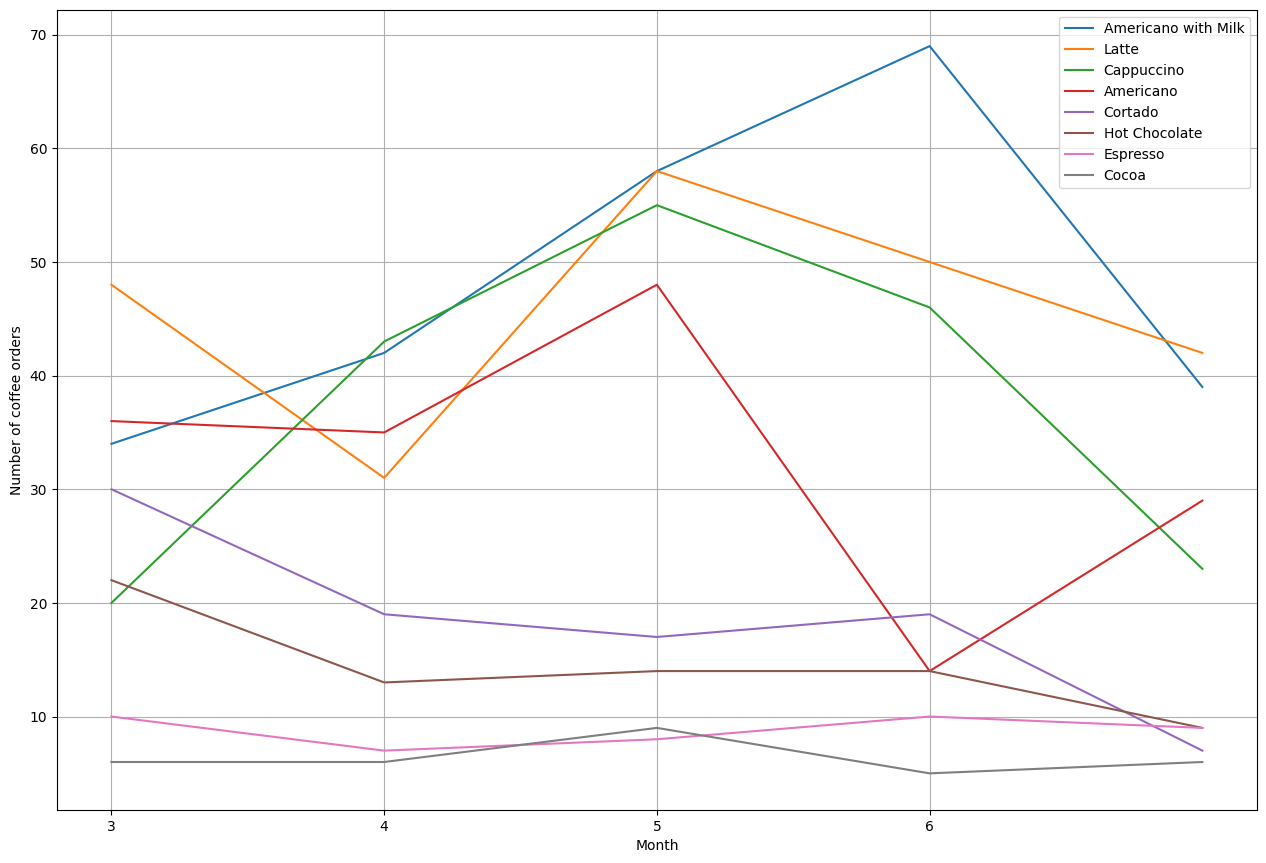

In [15]:
# Number of coffee orderes by day of week for every month

americano_with_milk = coffee[coffee['coffee_name']=='Americano with Milk']
latte = coffee[coffee['coffee_name']=='Latte']
cappuccino = coffee[coffee['coffee_name']=='Cappuccino']
americano = coffee[coffee['coffee_name']=='Americano']
cortado = coffee[coffee['coffee_name']=='Cortado']
hot_chocolate = coffee[coffee['coffee_name']=='Hot Chocolate']
espresso = coffee[coffee['coffee_name']=='Espresso']
cocoa = coffee[coffee['coffee_name']=='Cocoa']

fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(americano_with_milk.groupby('month').size(), label = 'Americano with Milk')
ax.plot(latte.groupby('month').size(), label = 'Latte')
ax.plot(cappuccino.groupby('month').size(), label = 'Cappuccino')
ax.plot(americano.groupby('month').size(), label = 'Americano')
ax.plot(cortado.groupby('month').size(), label = 'Cortado')
ax.plot(hot_chocolate.groupby('month').size(), label = 'Hot Chocolate')
ax.plot(espresso.groupby('month').size(), label = 'Espresso')
ax.plot(cocoa.groupby('month').size(), label = 'Cocoa')

plt.xlabel('Month')
plt.ylabel('Number of coffee orders')
plt.xticks(range(3,7))
plt.grid(True)
ax.legend(loc=0)

Text(120.72222222222221, 0.5, 'Hour of the day')

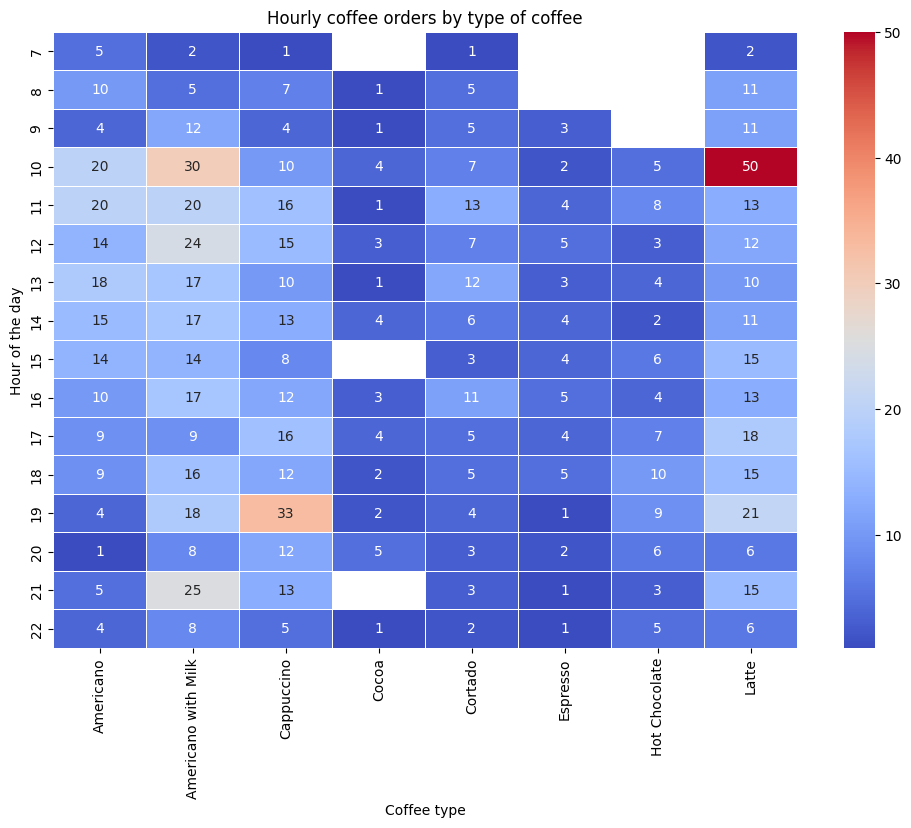

In [16]:
# Check if there is connection between hour and coffee type
pivot_table2 = coffee.pivot_table(index='hour', columns='coffee_name', values='datetime', aggfunc='count')

plt.figure(figsize=(12, 8))

sns.heatmap(pivot_table2, cmap='coolwarm', linewidths=.5, annot=True, fmt=".0f")
plt.title('Hourly coffee orders by type of coffee')
plt.xlabel('Coffee type')
plt.ylabel('Hour of the day')

<Axes: xlabel='month', ylabel='count'>

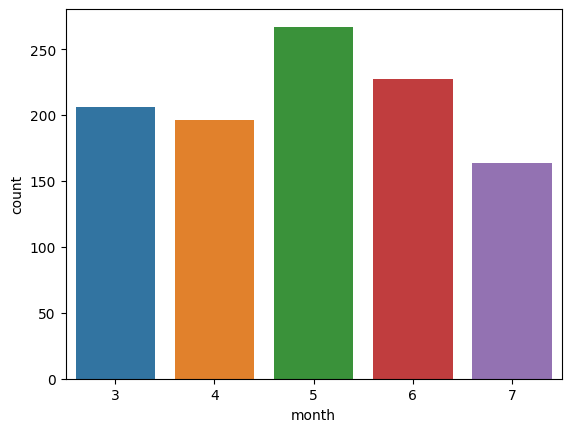

In [17]:
# Number of orders per month

sns.countplot(x='month', data=coffee)

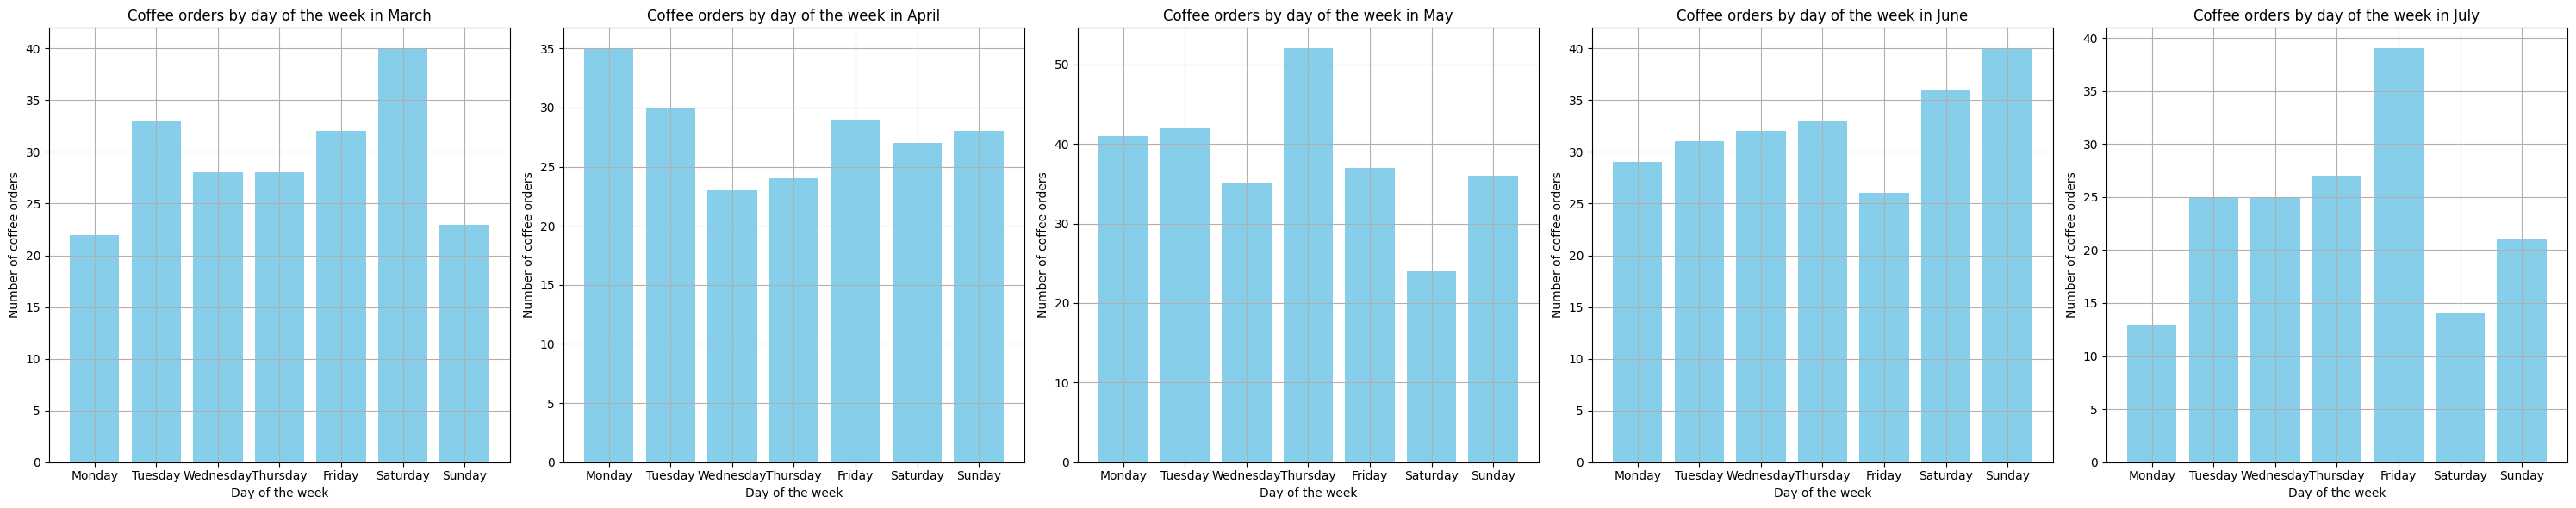

In [18]:
# Number of coffees ordered every month by day of the week

fig, axes = plt.subplots(1, 5, figsize=(30, 6))
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, month in enumerate(months):
    orders_per_day = coffee[coffee['month'] == month].groupby('day of week').size().reindex(days_of_week)
    axes[i].bar(days_of_week, orders_per_day, color='skyblue')
    axes[i].set_title(f'Coffee orders by day of the week in {titles[i]}')
    axes[i].set_xlabel('Day of the week')
    axes[i].set_ylabel('Number of coffee orders')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

Text(120.72222222222221, 0.5, 'Hour of the day')

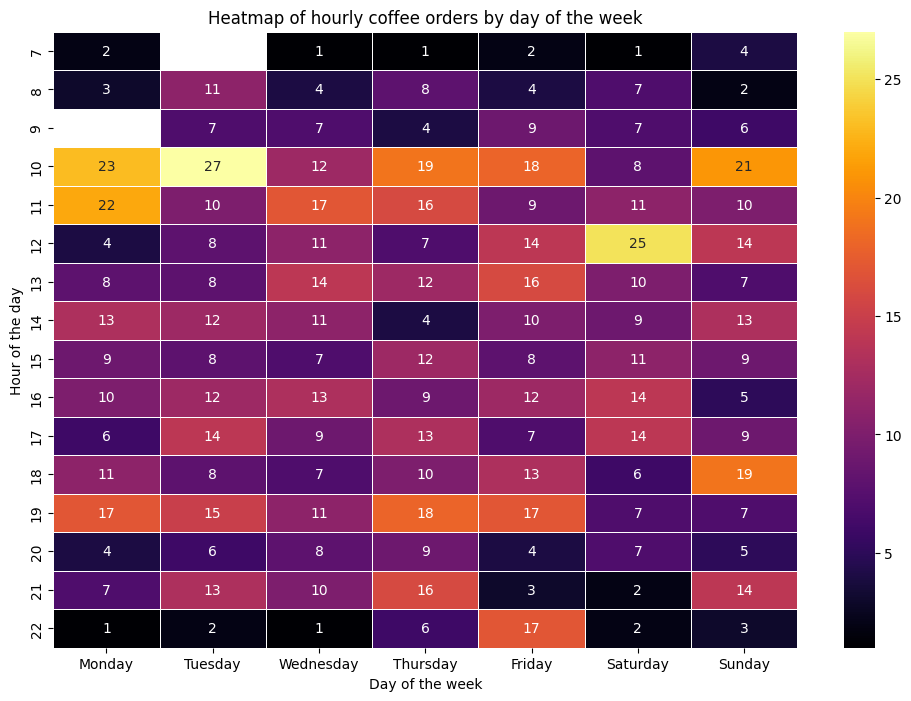

In [19]:
# Heatmap of hourly orders by day of the Week

pivot_table = coffee.pivot_table(index='hour', columns='day of week', values='datetime', aggfunc='count')

# The order of days is alphabetical, we need to rearrange it
pivot_table = pivot_table[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

plt.figure(figsize=(12, 8))

sns.heatmap(pivot_table, cmap='inferno', linewidths=.5, annot=True, fmt=".0f")
plt.title('Heatmap of hourly coffee orders by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Hour of the day')

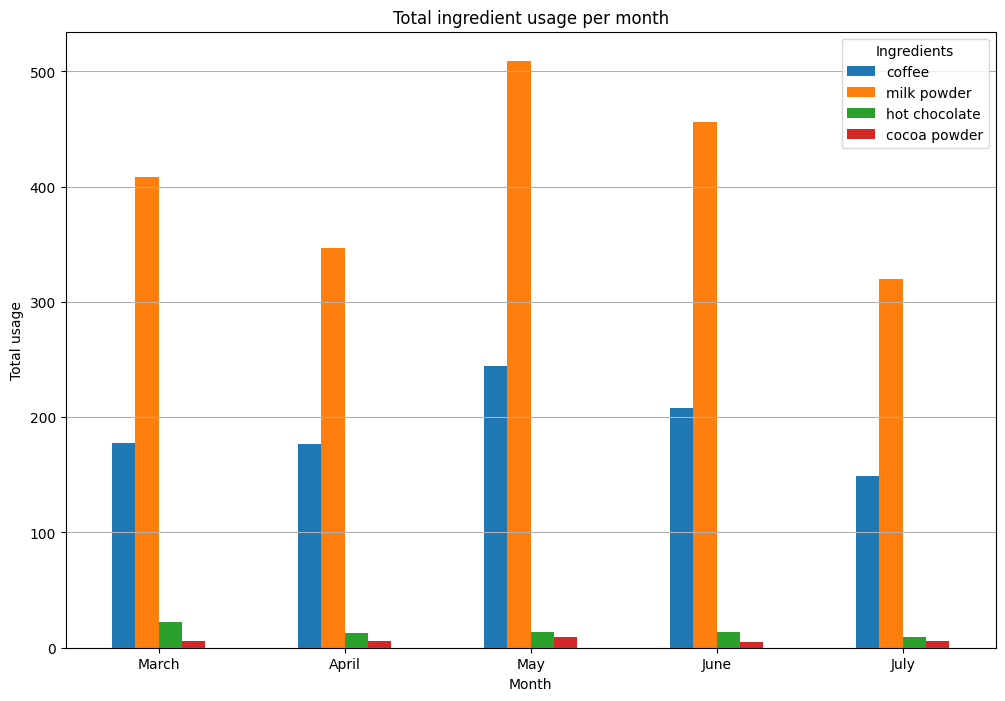

In [20]:
# Ingredients on a monthly basis

monthly_ingredients = coffee.groupby('month')[['coffee', 'milk powder', 'hot chocolate', 'cocoa powder']].sum()
monthly_ingredients.index = monthly_ingredients.index.map({3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July'})

monthly_ingredients.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Month')
plt.ylabel('Total usage')
plt.title('Total ingredient usage per month')
plt.xticks(rotation=0)
plt.legend(title='Ingredients')
plt.grid(axis='y')
plt.show()